## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [6]:
converted=len(df[df['converted']==1])/df.shape[0]*100 #calcualting the proportion
print(str(round(converted,2))+'%') #rounding it up

11.97%


e. The number of times the `new_page` and `treatment` don't match.

In [7]:
wrong1=df.query("group == 'treatment' & landing_page == 'old_page'").shape[0] #number of cases when treatment is using old page
wrong2=df.query("group == 'control' & landing_page == 'new_page'").shape[0] #number of cases when control is using new page
wrong_match=wrong1+wrong2 #total
print(wrong_match)

3893


f. Do any of the rows have missing values?

In [8]:
print(df.info())
print('There is no missing values')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
None
There is no missing values


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
wrong1=df.query("group == 'treatment' & landing_page == 'old_page'") #cases when treatment is using old page
wrong2=df.query("group == 'control' & landing_page == 'new_page'")  #cases when control is using new page
to_drop=wrong1.index.append(wrong2.index)  #combining the indices numbers of all wrong cases
print(to_drop) #indices to drop
df2=df #renaming the dataframe to the required one
df2.drop(to_drop,inplace=True) #dropping the indices from the second dataframe


Int64Index([   308,    327,    357,    685,    713,    776,    889,   1037,
              1106,   1376,
            ...
            293393, 293480, 293568, 293662, 293888, 293894, 293996, 294200,
            294253, 294331],
           dtype='int64', length=3893)


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2.user_id.duplicated(keep=False)].user_id #finding the duplicated users

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2.user_id.duplicated(keep=False)] #Duplicated user info

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.drop(2893,inplace=True) #removing one of the indices

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
len(df2[df2['converted']==1])/df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
(df2.query('group == "control"')['converted']).mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [1]:
(df2.query('group == "treatment"')['converted']).mean()

NameError: name 'df2' is not defined

d. What is the probability that an individual received the new page?

In [18]:
len(df2[df2['landing_page']=='new_page'])/df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

<font size="4">The proportion of new pages and old pages used are almost fifity-fifty, so each page type can be fairly compared. looking at the probaility that they converted for each type, the new page gets a tiny advantage over the old page but however it can be neglectable as the margine is very low.
In conculsion there is NO sufficient evidence to conclude that the new treatment page leads to more conversions.</font>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<font size="4">$H_{o}$​:**$p_{new}$**​≤**$p_{old}$**​</font>

<font size="4">$H_{1}$:**$p_{new}$**>**$p_{old}$**</font>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
p_new = df2['converted'].mean()
print(p_new)

0.11959708724499628


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
p_old = df2['converted'].mean() #assuming both p are the same
print(p_old)

0.11959708724499628


c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
n_new = df2[df2['group'] == 'treatment'].shape[0]
print(n_new)

145310


d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
n_old = df2[df2['group'] == 'control'].shape[0]
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
#simluaing the conversion rate for the new page at p_new 
new_page_converted = np.random.choice([0, 1], size = n_new, p = [1 - p_new, p_new])
print(new_page_converted.mean())

0.11949624939783911


f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
#simluaing the conversion rate for the old page at p_old 
old_page_converted = np.random.choice([0, 1], size = n_old, p = [1 - p_old, p_old])
print(old_page_converted.mean())

0.12047579057505128


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
diff = new_page_converted.mean()-old_page_converted.mean()
print(diff)

-0.000979541177212176


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:

"""
Similating 10000 random values for the conversion rate of both pages
for _ in range(10000):
    new_page_converted = np.random.choice([0, 1], size = n_new, p = [1 - p_new, p_new]).mean()
    old_page_converted = np.random.choice([0, 1], size = n_old, p = [1 - p_old, p_old]).mean()
    diff = new_page_converted.mean()-old_page_converted.mean()
    p_diffs.append(diff)
#instead of using this method which will take a considerable amount to excute, using numpy bult in operationsis less time consuming
"""
p_diffs=[]
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs= new_converted_simulation - old_converted_simulation

In [27]:
p_diffs=np.array(p_diffs)  #putting the values in anumpy array
print(p_diffs)

[-0.00108959  0.00036256 -0.00019474 ...  0.0011473  -0.00256242
 -0.00027077]


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

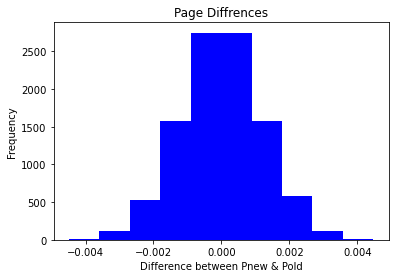

In [28]:
plt.hist(p_diffs, color = "blue")
plt.title("Page Diffrences")
plt.xlabel('Difference between Pnew & Pold')
plt.ylabel('Frequency');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
#the conversion rate for all data
act_new_page_converted = df.query('landing_page == "new_page"')['converted'].mean()
act_old_page_converted = df.query('landing_page == "old_page"')['converted'].mean()
act_diff = act_new_page_converted - act_old_page_converted
#Finding the p value from both the simulated data and all data 
p_val=(p_diffs > act_diff).mean()
print(p_val)

0.9079


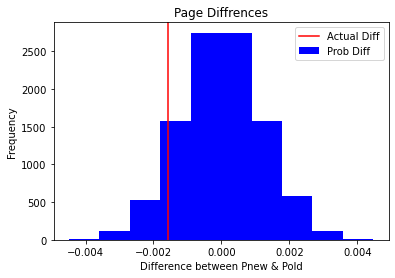

In [30]:
plt.hist(p_diffs, color = "blue", label='Prob Diff')
plt.title("Page Diffrences")
plt.xlabel('Difference between Pnew & Pold')
plt.ylabel('Frequency')
plt.axvline(act_diff,color='Red', label='Actual Diff')
plt.legend();

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<font size="4"> 
    By using bootstrapping to simuliate 100000 instances of the diffrences between the converting porpotions of both the new and old page, we get p_diffs. Then by finding Conversion rates between ALL the new and old page in the data we obtian the actual differnce act_diff. by comparing both values and finding the ones that have P_diffs value greater than act_diff, we finally obtian the P value. by using this value we can deteremine if we reject or accept the null hypothesis. as the larger the P value the more we can accept the null hypothesis and decide Whether the old or the new page is better.
    </font>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old =  df2[df2['group'] == 'control'].shape[0]
n_new = df2[df2['group'] == 'treatment'].shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [32]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score)
print(p_value)

1.3109241984234394
0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<font size="4"> Having P Value of 0.905 which is much higher than alpha(0.05) with having Z score of 1.31. they mean that the old page conversion rate is the same or better than the new one, so we can conculude that we will fail to reject the null hypothesis. Both the findings from the two methods say the same thing and have similar values.
</font> 


<font size="4">
        </font>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

<font size="4"> Logistic regression would be the best suited for this case</font>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
df2['intercept'] = 1     #intializing the intercept
df2[['ab_page', 'old_page']] = pd.get_dummies(df2['landing_page']) #creating the dummy variable
df2.drop(['old_page'], axis =1 , inplace = True) #dropping unwanted column 
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [34]:
#fitting and running the model
log_mod= sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2021-04-17 00:38 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

<font size="3">The null and alt hypotheses in this case:</font>

<font size="4">$H_{o}$​:**$p_{new}$**​=**$p_{old}$**​</font>

<font size="4">$H_{1}$:**$p_{new}$**≠**$p_{old}$**</font>

<font size="3">the P value for ab_page in this case is 0.1899. since in part two it was only one sided test while in logistic regression its two sided test. </font>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<font size="4">Adding couple of other factors into the model may lead to more clearer idea of the basis these factors can influence on our desired goal (in this case finding out whether page is better when it comes to converting)and have an affect on our decision. However in some cases some factors can have a little to no affect whatsoever and/or may produce undesired outcomes.
     </font>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [36]:
df_con = pd.read_csv('countries.csv')
df_merge=pd.merge(df2,df_con,left_on='user_id',right_on='user_id') #merging both data sets based on user id
df_merge.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [37]:
df_merge.info() #checking for non values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290583
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
 5   intercept     290584 non-null  int64 
 6   ab_page       290584 non-null  uint8 
 7   country       290584 non-null  object
dtypes: int64(3), object(4), uint8(1)
memory usage: 18.0+ MB


In [38]:
print('list of unique countries:', df_merge['country'].unique())
print('number of values in each country:\n',df_merge['country'].value_counts())

list of unique countries: ['US' 'CA' 'UK']
number of values in each country:
 US    203619
UK     72466
CA     14499
Name: country, dtype: int64


In [39]:
#intializing the intercept and creating the dummy variables
df_merge['intercept'] = 1
df_merge[['US', 'UK', 'CA']] = pd.get_dummies(df_merge['country'])
df_merge.drop('CA', axis = 1, inplace=True)
df_merge.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0


In [40]:
#fitting and running the model
log_mod = sm.Logit(df_merge['converted'], df_merge[['intercept','ab_page', 'US', 'UK']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [41]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2021-04-17 00:38 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
US           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [42]:
#creating the columns that interact between ab page and the used countries 
df_merge['US_abpage']=df_merge.US * df_merge.ab_page
df_merge['UK_abpage']=df_merge.UK * df_merge.ab_page
df_merge.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,UK,US_abpage,UK_abpage
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,0,0


In [43]:
#fitting and running the model
log_mod = sm.Logit(df_merge['converted'], df_merge[['intercept', 'ab_page','US','US_abpage','UK', 'UK_abpage']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [44]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2021-04-17 00:38 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
US           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
US_abpage    -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
UK_abpage     0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
==================================================================

"""

<font size="4">neither the p value for each country and ab_page is lower than the alpha(0.05)thus we can conculde that we don't have enough evidence that countries are a deciding factor when it comes to conversion rate for each  page type. it tell us not to reject the null hypothesis as well</font>

<font size="4">**IN CONCULSION** based on the two tests we have made in part 2 and 3 we have failed to reject the null hypothesis thus redeaming the old page as being better or as the same as the new page. and based on the logistics and other factors like user prefrences it would be much advised to stick to the old page model or invest in a new and better page model than the current new one </font>
    

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

1